# Creating Promises

+ object in js
+ used for handling asynchronous code neatly
+ recommended option in js

## Promises vs Callbacks

Normally the code is synchronous

```js
let a = 10;
console.log(a + 1);
```

But when the code tends to do work without the knowledge of completion time, it is called **asynchronous task**

For example, 
+ network requests
+ timers
+ events
+ threads

```js
let file1 = $.get("file1.json");

console.log(file1); // undefined
```

Call backs are the default JS techinque of handling the asynchronous code.

It looks like

In [1]:
// an async function
function asyncHello(name, callback)
{
    // an async task
    setTimeout(function() {
        // on timeout run the function, with two params
        callback(null, `Async Hello, ${name}`);
    }, 0); // async even though the timeout is 0 milisec
}

In [2]:
// calling the function
let name = "Gurkirat";
asyncHello(name, function(err, msg) {
    console.log(msg);
});

console.log(`Sync Hello, ${name}`);

Sync Hello, Gurkirat


If there exists more callbacks in callbacks. It will make **Pyramid of Doom** and this will make more difficult to handle errors

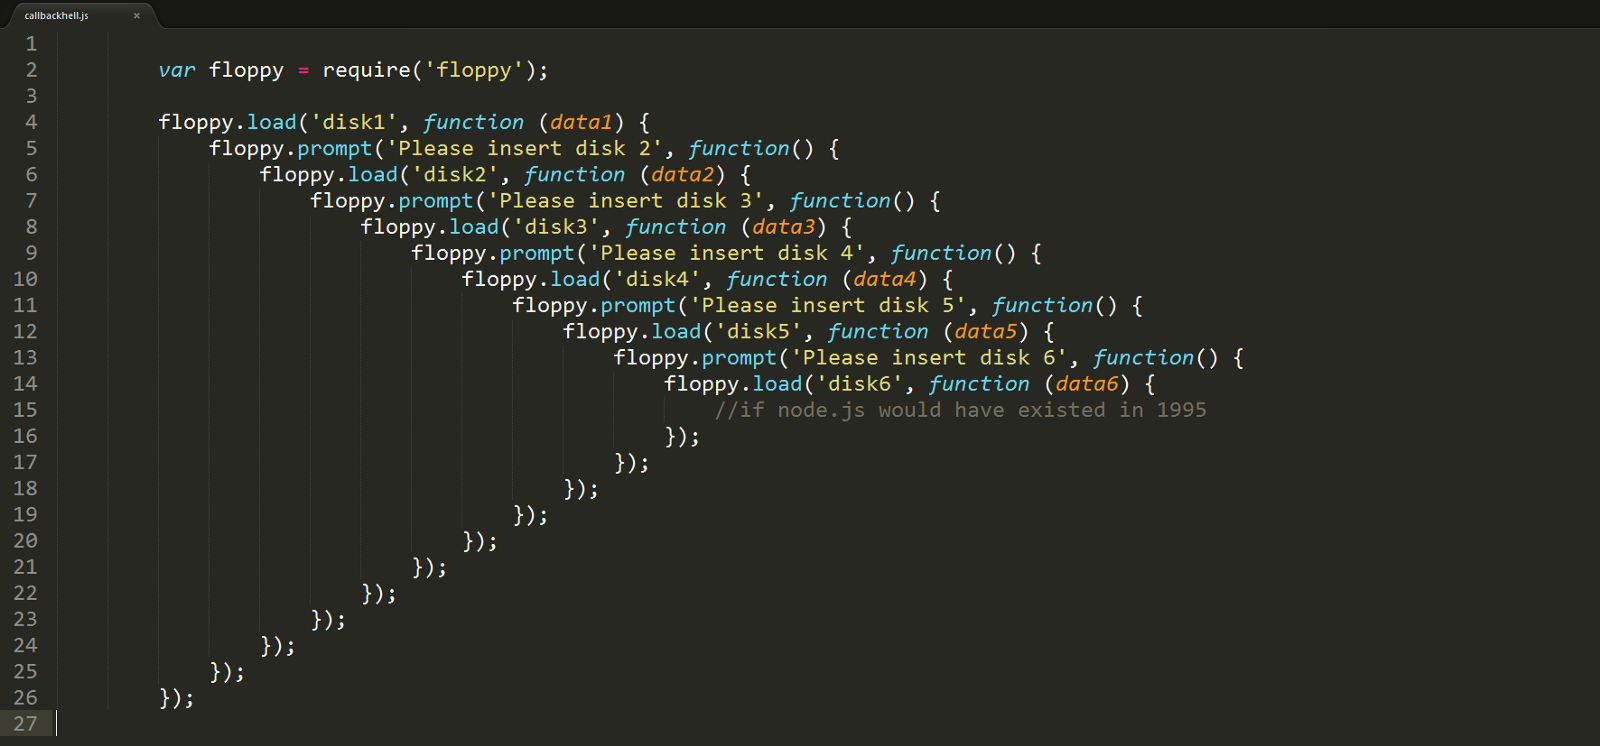
<br>
<div style="text-align: center"><i>Pyramid of Doom</i></div>

**Glimpse of Promise code**

```js
get("something.json")
.then(doSomething)
.then(doSomeAnotherTask)
.catch(retriveTheCauseofError)
```

## Syntax of Promise

+ created by the promise constructor
+ no library needed
+ try/catch wrapper around a code that will finish after an undefined time
+ two states
    + pending
        + async task is being performed
        + no `then`, `catch` is called
    + settled
        + rejected, any error occured during the async code
        + resolved, all the code ran successfully

**Note:** Either of settled state will be reported, both won't.


```js
new Promise( function (resolve, reject) { // reject is optional
    // do something
    
    if (/*something done worked*/)
    {
        resolve(/*send some data if you want to*/);
    }
    else
    {
        reject(/*send some data if you want to*/);
    }
})
    .then(doSomethingonResolve)
    .catch(doSomethingonError);
```

**Note:** The reject is an optional argument and can be neglected

In [3]:
function promisedHello(name)
{
    // returning the promise
    return new Promise( (resolve) => {
        setTimeout(function() {
            // resolving the task
            resolve(`Hello, ${name}`);
        }, 1000);
    })
}

Async Hello, Gurkirat


In [4]:
promisedHello("Gurkirat").then(console.log);

Hello, Gurkirat


The above example was pretty boring, let us try to wrap HTTP Get request

In [5]:
var http = require("https");

function promisedGet(url)
{
    // returning new promise object
    return new Promise( (resolve, reject) => {
        http
          .get(url, response => {
            response.setEncoding("utf8");

            let data = "";

            response.on("data", chunk => {
              data += chunk;
            });

            response.on("end", () => {
              resolve(data);
                console.log(data)
            });

            response.on("error", err => {
              reject("Error Logged:" + err.message);
            });
          })
          .on("error", err => {
            reject("Error Logged:" + err.message);
          });
    } );
}

In [11]:
// testing working URl
var promise = promisedGet("https://jsonplaceholder.typicode.com/users/1")
.then(JSON.parse)
.catch(console.error)

{
  "id": 1,
  "name": "Leanne Graham",
  "username": "Bret",
  "email": "Sincere@april.biz",
  "address": {
    "street": "Kulas Light",
    "suite": "Apt. 556",
    "city": "Gwenborough",
    "zipcode": "92998-3874",
    "geo": {
      "lat": "-37.3159",
      "lng": "81.1496"
    }
  },
  "phone": "1-770-736-8031 x56442",
  "website": "hildegard.org",
  "company": {
    "name": "Romaguera-Crona",
    "catchPhrase": "Multi-layered client-server neural-net",
    "bs": "harness real-time e-markets"
  }
}


In [10]:
// tesings non working api
var promise = promisedGet("https://bad_url.com")
.then(JSON.parse)
.catch(console.error);

Error Logged:getaddrinfo ENOTFOUND bad_url.com bad_url.com:443


## Fetch API

+ promise-based mechanism for programmatically making web requests in the browser
+ replacement for most uses of XMLHttpRequest in traditional web applications
+ compatible with almost all browser
+ recommended over XHRs

Syntax

```js
let promise = fetch(url, [options])
```

For example, 

```js

fetch("https://jsonplaceholder.typicode.com/users/1");
    .then(console.log)
    .catch(console.error);
```

When a promise is returned inside a **then** body, it can be used `chained` and used by the successive then

For example,

```js

fetch("https://jsonplaceholder.typicode.com/users/1");
    .then(response => response.json()) // return a promise
    .then(console.log) // show the parsed JSON
    .catch(console.error);  // all the errors are catched here

```

## Chaining Promises

Adding more then(_s_) after then is called chaining of promises

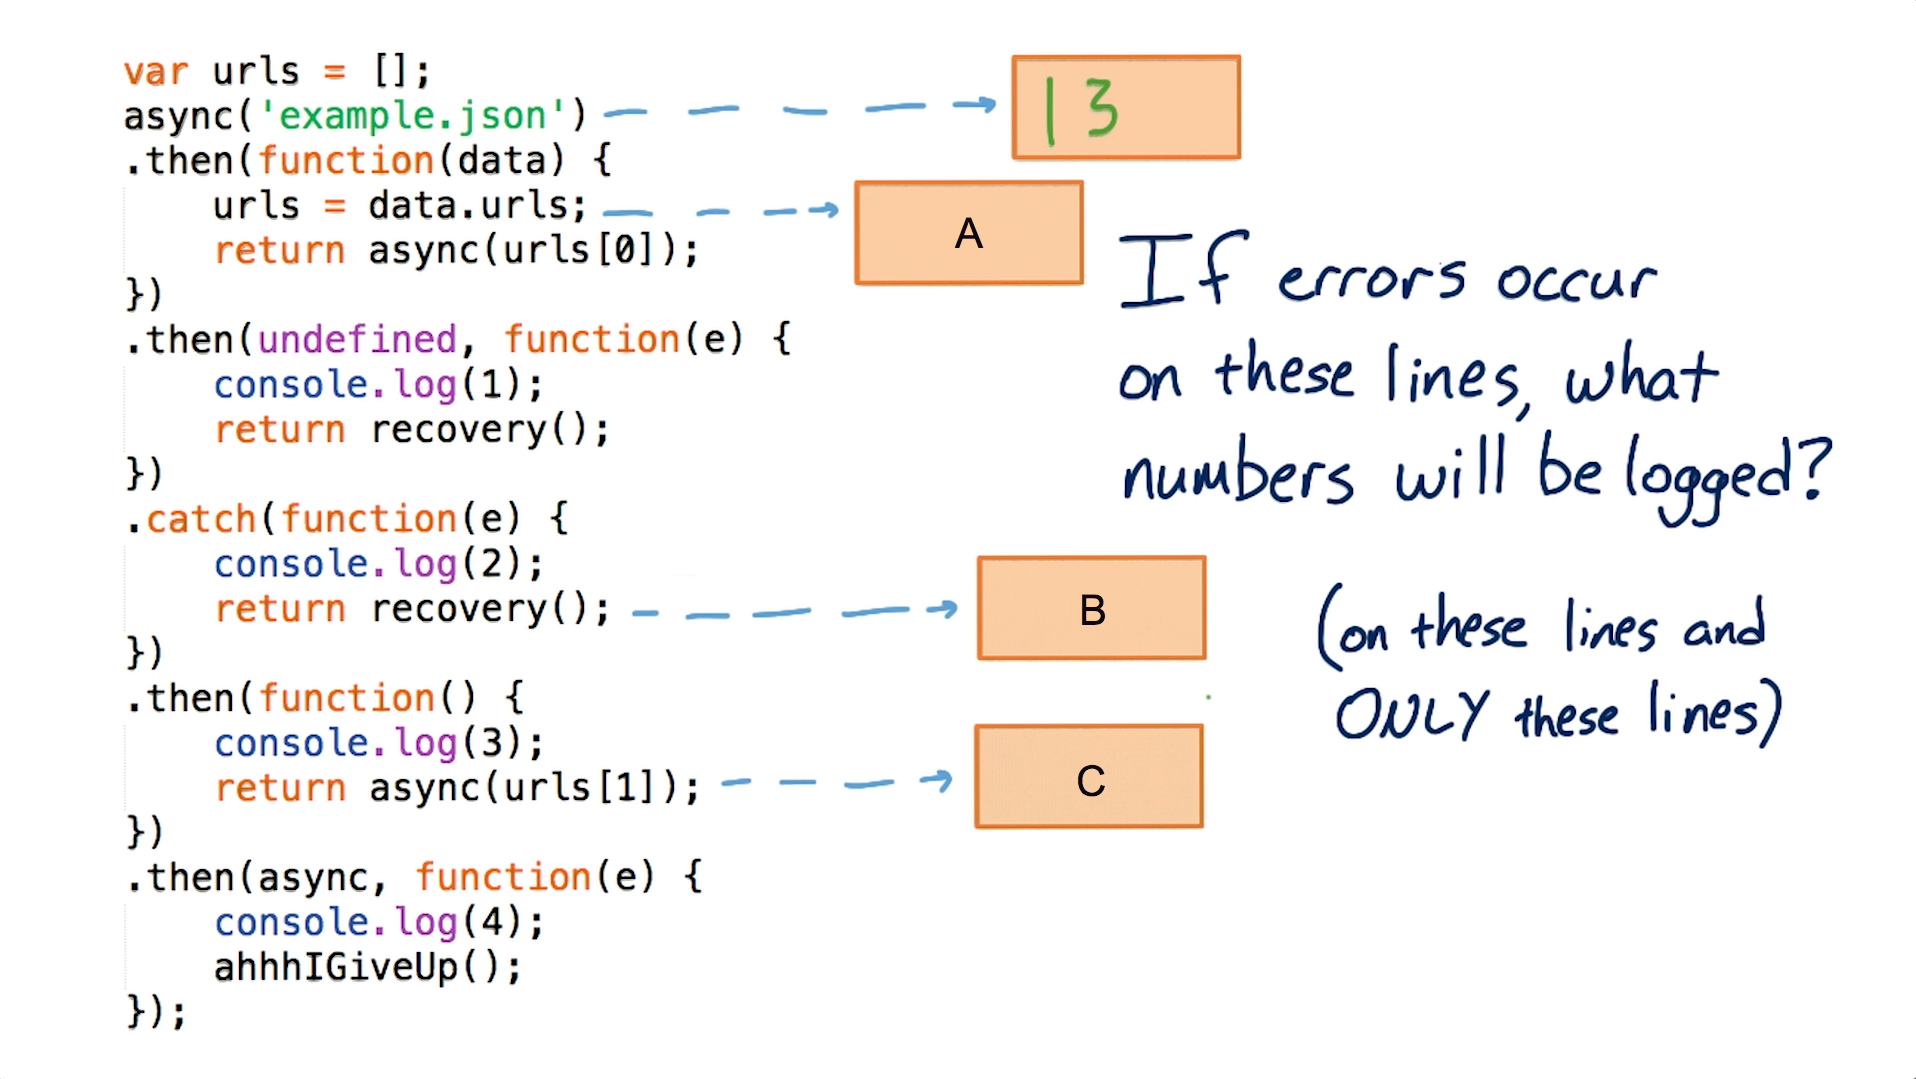

<br>
<div style="text-align: center"><i>Chaining in Action</i></div>


**Chaining in Actions**

In [15]:
function doSomeChainedTask()
{
    return new Promise( (resolve, reject) => {
        setTimeout( () => {
            resolve(1);
        }, 1000 );
    } )
}

In [18]:
doSomeChainedTask()
    .then(value => value * 2) // will be passed to the following then, nothing will be printed
    .then(value => value * 20) // will be passed to the following then, nothing will be printed
    .then(console.log) // answer will be printed here
    .catch(console.error);

40


**Note:** A synchronous task will always be _Series_. An asynchronous task will either be _Series (if chained)_ or _Parallel (if run independently, in new lines)_

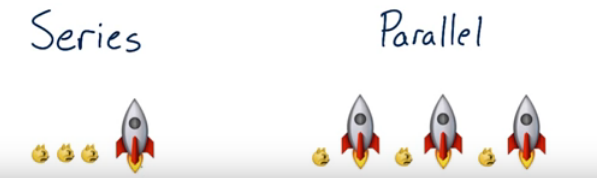
<br>
<div style="text-align: center"><i>Series vs Parallel</i></div>

**Running all promises in the parallel**

It is a feature in promise to run all the promise in parallel and return the array of then (s) in sequential order

In [20]:
let promises = [Promise.resolve(1), Promise.resolve(2), Promise.resolve(3)]; // its the shortest method to resolve a promise

In [21]:
Promise.all(promises)
    .then(console.log)
    .catch(console.error) // returns the first rejected promise

[ 1, 2, 3 ]


**Note:** If one promise fails, the successive promises will be ignored

**Bonus:** Running async code synchronously using promises. 